<a href="https://colab.research.google.com/github/Gitjesus22/Rstudio/blob/main/5.3.1_Dplyr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table><tr>
<td><img src="https://solariabiodata.com.mx/wp-content/uploads/2021/07/logo_red.png" alt="Soluciones de siguiente generacion" width=200/>
<td>
<td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/160px-R_logo.svg.png">
<td><img src="https://d33wubrfki0l68.cloudfront.net/621a9c8c5d7b47c4b6d72e8f01f28d14310e8370/193fc/css/images/hex/dplyr.png" width=200/>
</tr></table>

|Asegúrate de cargar la librería Tidyverse antes de comenzar a utilizar este notebook|
|----------------------------------------|

In [ ]:
library(tidyverse)
install.packages("nycflights13")
library(nycflights13)
install.packages("Lahman")
library(Lahman)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Transformación de datos

La visualización es una herramienta importante para la generación de conocimiento, a menudo tendrás que crear algunas variables nuevas o resúmenes, o tal vez solo quieras cambiar el nombre de las variables o reordenar las observaciones para facilitar el trabajo con los datos.

## Introducción a dplyr


Para explotar los verbos básicos de manipulación de datos de dplyr usaremos `flights` . Este conjunto de datos contiene los 336,776 vuelos que partieron de la ciudad de NY durante el 2013

In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Como podrás haber notado, antes de visualizar la tabla de datos podemos observar que nuestra base es un `tibble` esto lo estaremos checando con más profundidad en el notebook de `tibble`

También podrás haber notado la fila de tres (o cuatro) abreviaturas de letras debajo de los nombres de las columnas. Estos describen el tipo de cada varibale: 

* `int` significa enteros.
* `dbl` significa dobles, o números reales.
* `chr` significa vectores de caracteres o cadenas.
* `dttm` significa fechas y horas (una fecha + una hora).


### Lo básico de dplyr

Dplyr gira en torno a cinco funciones que te permiten resolver la gran mayoría de tus desafíos de manipulación de datos:

1. Filtrar o elegir las observaciones por sus valores (`filter()`)
2. Reordenar las filas (`arrange()`)
3. Selecciona las variables por sus nombres (`select()`)
4. Crear nuevas variables con transformaciones de variables existentes (`mutate()`)
5. Contraer muchos valores en un solo resumen (`summarise()`)

Todas estas funciones se pueden usar junto con `group_by()` que cambia el alcance de cada función para que actúe ya no sobre todo el conjunto de datos sino de grupo en grupo. Estas seis funciones conforman los verbos para este lenguaje de manipulación de datos. 

Todos los verbos funcionan de manera similar: 

1. El primer argumento es un *data frame* 
2. Los argumentos posteriores describen qué hacer con el *data frame* usando los nombres de las variables (sin comillas)
3. El resultado es un nuevo *data frame* 

## Filtrar filas con `filter()`

`filter()`te permite filtrar un subconjunto de observaciones según sus valores. El primer argumento es el nombre del *data frame*. El segundo y los siguientes argumentos son las expresiones que lo filtran. Por ejemplo, podemos seleccionar todos los vuelos del 1 de enero con: 

In [ ]:
filter(flights, month == 1, day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
filter(flights, origin == "JFK", dest == "MIA", month == 4 , day== 30)

Cuando ejecutas esa línea de código, `dplyr`ejecuta la operación de filtrado y devuelve un nuevo *data frame*. Las funciones de `dplyr` nunca modifican su *input*, por lo que si deseas guardar el resultado necesitarás usar el operador de asignación, `<-`

In [ ]:
jan1 <- filter(flights, month == 1, day == 1)

R imprime los resultados o los guarda en una variable. Si deseas hacer ambas cosas puedes escribir toda la línea entre paréntesis: 

In [ ]:
(dec25 <- filter(flights, month == 12, day == 25))

### Comparaciones

Para usar el filtrado de manera efectiva, debes saber cómo seleccionar las observaciones que deseas utilizando los operadores de comparación. R proporciona el conjunto estándar: `>`, `>=`, `<`, `<=`, `!=` (no igual) y `==` (igual)

Evita cometer errores básicos como usar `=`, en lugar de `==`cuando se busca igualdad. 

In [ ]:
filter(vuelos, mes = 1)

ERROR: ignored

### Operados lógicos

Si tienes múltiples argumentos para `filter()` estos se pueden combinar con "y": cada expresión debe ser verdadera para que una fila se incluya en el *output* . Para otros tipos de combinaciones necesitarás usar operadores Booleanos: `&` es "y", `|` es "o", y `!` es "no"

El siguiente código sirve para encontrar todos los vuelos que partieron en noviembre y diciembre:

In [ ]:
filter(flights, month == 11 | month == 12)

El orden de las operaciones no funciona como en español, no puedes escribir `filter(flights, month == (11|12))`, que literalmente puede traducirse como "encuentra todos los vuelos que partieron en noviembre o diciembre". En cambio, encontrará todos los meses que son iguales a `11|12` , una expresión que resulta en ´TRUE´. En un contexto numérico (como aquí), ´TRUE´ se convierte en uno, por lo que encuentra todos los vuelos en enero, no en noviembre o diciembre.




In [ ]:
filter(flights, month == (11|12))

Una manera rápida y útil de resolver este problema es `x %in% y` (es decir, *x* en *y* ). Esto seleccionará cada fila donde `x` es uno de los valores en `y`. Podríamos usarlo para reescribir el código de arriba:

In [ ]:
nov_dic <- filter(flights, month %in% c(11,12))
nov_dic

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00
2013,11,1,550,600,-10,705,659,6,US,2167,N748UW,LGA,DCA,57,214,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,659,701,-2,US,2134,N742PS,LGA,BOS,40,184,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,826,827,-1,DL,563,N912DE,LGA,ATL,126,762,6,0,2013-11-01 06:00:00


### Valores faltantes

Una característica importante de R que puede hacer que la comparación sea difícil son los valores faltantes, o `NA`s. `NA` representa un valor desconocido, lo que hace que los valores perdidos se vuelvan "contagiosos". Casi cualquier operación que involucre un valor desconocido también arrojará valores `NA`.

In [ ]:
NA > 5
10 == NA
NA + 10

[1] NA

[1] NA

[1] NA

si deseas determinar si falta un valor, usa `is.na()` 

In [ ]:
x <- NA
is.na(x)

[1] TRUE

`filter()` solo incluye filas donde la condición es `TRUE`; excluye tanto los valores `FALSE` como `NA`. Si deseas conservar valores perdidos, solicítalos explícitamente: 

In [ ]:
df <- tibble(x = c(1, NA, 3))
filter(df, x > 1)

#Para llamar a los valores faltantes
filter(df, is.na(x) | x > 1)

x
<dbl>
3


x
<dbl>
NA
3


### Ejercicios

1. Encuentra todos los vuelos que: 

* Tuvieron un retraso de llegada de dos o más horas.
* Volaron a Houston (`IAH`o `HOU`)
* Fueron operados por United, American o Delta
* Partieron en invierno del emisferio sur (julio, agosto y septiembre)
* Llegaron más de dos horas tarde, pero no salieron tarde
* Se retrasaron por lo menos una hora, pero repusieron más de 30 minutos de vuelo
* Partieron entre la medianoche y las 6 a.m. (incluyente).

---

2. Otra función de **dplyr** que es útil para usar filtro es `between()`. ¿Qué hace? ¿Puedes usarla para simplificar el código necesario para responder a los desafíos anteriores?

---


3. ¿Cuántos vuelos tienen datos faltantes en `horario_salida`? ¿Qué otras variables tienen valores faltantes? ¿Qué representan estas filas?

---

4. ¿Por qué `NA^0` no es faltante? ¿Por qué `NA | TRUE` no es faltante? ¿Por qué `FALSE & NA` no es faltante? ¿Puedes descubrir la regla general? (¡`NA*0` es un contraejemplo complicado!)

---

## Reordenar filas con `arrange()` 

`arange()` funciona de manera similar a `filter()` excepto que en lugar de seleccionar filas, cambia su orden. La función toma un *data frame* y un conjunto de nombres de columnas (o expresiones más complicadas) para ordenar según ellas. Si proporcionas más de un nombre de columna, cada columna adicional se utilizará para romper empates en los valores de las columnas anteriores

In [ ]:
arrange(flights, year, month, day)

In [ ]:
arrange(flights, dep_delay)

Usa `desc()`para reordenar una columna en orden descendente:

In [ ]:
arrange(flights, desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


Los valores faltantes siempre aparecen al final después de ordenar los datos: 

In [ ]:
df <- tibble(x = c(5, 2, NA))
arrange(df, x)
arrange(df, desc(x))

x
<dbl>
2
5
NA


x
<dbl>
5
2
NA


### Ejercicios

1. ¿Cómo podrías usar `arrange()`para ordenar todos los valores faltantes al comienzo? (Sugerencia: usa `is.na()`) 

---

2. Ordena los `vuelos` para encontrar los vuelos más retrasados. Encuentra los vuelos que salieron más temprano. 

---

3. Ordena los `vuelos` para encontrar los vuelos más rápidos.

---

4. ¿Cuáles vuelos viajaron más lejos? ¿Cuál viajó más cerca?

---

## Seleccionar columnas con `select()` 

No es raro obtener conjuntos de datos con cientos o incluso miles de variables. En este caso, el primer desafío a menudo se reduce a las variables que realmente te interesan. `select()` te permite seleccionar rápidamente un subconjunto útil usando operaciones basadas en los nombres de las variables.

`select()` no es útil con los datos de flights porque solo tenemos 19 variables, pero de todos modos se entiende la idea general: 

In [ ]:
# Selecciona las siguientes columnas
select(flights, year, month, day)

In [ ]:
# Selecciona todas las columnas que estén entre year y day (incluyendolas)
select(flights, year:day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [ ]:
#Selecciona todas las columnas excepto aquellas que estén entre year y day incluyéndolas
select(flights, -(year:day))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Existen una serie de funciones auxiliares que puedes usar dentro de `select()`:

* `starts_with("abc")`: coincide con los nombres que comienzan con "abc".
* `ends_with("xyz")`: coincide con los nombres que terminan con "xyz".
* `contains("ijk")`: coincide con los nombres que contienen "ijk".
* `matches("(.)\\1")`: selecciona variables que coinciden con una expresión regular. Esta en particular coincide con cualquier variable que contenga carácteres repetidos. 
* `num_range("X", 1:3)`: coincide con x1, x2, x3.

Consulta `?select()` para más detalles.

`select()` se puede usar para cambiar el nombre de las variables, pero rara vez es útil porque descarta todas las variables que no se mencionan explícitamente. En su lugar, utiliza `rename()`, que es una variante de `select()` que mantienen todas las variables que no se mencionan explícitamente: 

In [ ]:
rename(flights, tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Otra opción es usar `select()` junto con el auxiliar `everything()`. Esto es útil si tienes un grupo de variables que te gustaría mover al comienzo del *data frame*. 

In [ ]:
select(flights, time_hour, air_time, everything())

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0


### Ejercicios

1. Haz una lluvia de ideas sobre tantas maneras como sea posible para seleccionar `horas_salida`, `atraso_salida`, `horario_llegada`, y `atraso_llegada` de vuelos.

---

2. ¿Qué sucede si incluyes el nombre de una variable varias veces en una llamada a `select` ?

---

3. ¿Qué hace la función `any_of()`? ¿Por qué podría ser útil en este vector?


In [ ]:
vars <- c("año", "mes", "día", "atraso_salida", "atraso_llegada")

---

4. ¿Te sorprende el resultado de ejecutar el siguiente código? ¿Cómo tratan por defecto las funciones auxiliares de `select()`a las palabras en mayúsculas o en minúsculas? ¿Cómo puedes cambiar ese comportamiento predeterminado?

In [ ]:
select(flights, contains("TIME"))

---

## Añadir nuevas variables con `mutate()` 

A menudo es útil crear nuevas columnas en función de columnas existentes. Ese es el trabajo de `mutate()`.

`mutate()`siempre agrega nuevas columnas al final de un conjunto de datos, así que comenzaremos creando un conjunto de datos más pequeño para que podamos ver las nuevas variables. 

In [ ]:
flights_sml <- select(flights,
year:day, 
ends_with("delay"), 
distance, 
air_time
)
mutate(flights_sml,
gain = dep_delay - arr_delay,
speed = distance / air_time * 60
)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,370.0441
2013,1,1,4,20,1416,227,-16,374.2731
2013,1,1,2,33,1089,160,-31,408.3750
2013,1,1,-1,-18,1576,183,17,516.7213
2013,1,1,-6,-25,762,116,19,394.1379
2013,1,1,-4,12,719,150,-16,287.6000
2013,1,1,-5,19,1065,158,-24,404.4304
2013,1,1,-3,-14,229,53,11,259.2453
2013,1,1,-3,-8,944,140,5,404.5714


Ten en cuenta que puedes hacer referencia a las columnas que acabas de crear.

In [ ]:
mutate(flights_sml,
gain = dep_delay - arr_delay,
hours = air_time / 60,
gain_per_hour = gain / hours)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.7833333,-2.3788546
2013,1,1,4,20,1416,227,-16,3.7833333,-4.2290749
2013,1,1,2,33,1089,160,-31,2.6666667,-11.6250000
2013,1,1,-1,-18,1576,183,17,3.0500000,5.5737705
2013,1,1,-6,-25,762,116,19,1.9333333,9.8275862
2013,1,1,-4,12,719,150,-16,2.5000000,-6.4000000
2013,1,1,-5,19,1065,158,-24,2.6333333,-9.1139241
2013,1,1,-3,-14,229,53,11,0.8833333,12.4528302
2013,1,1,-3,-8,944,140,5,2.3333333,2.1428571


Si solo quieres conservar las nuevas variables, usa `transmutate()` 

In [ ]:
transmute(flights, 
gain = dep_delay - arr_delay,
hours = air_time / 60,
gain_per_hour = gain /hours
)

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.7833333,-2.3788546
-16,3.7833333,-4.2290749
-31,2.6666667,-11.6250000
17,3.0500000,5.5737705
19,1.9333333,9.8275862
-16,2.5000000,-6.4000000
-24,2.6333333,-9.1139241
11,0.8833333,12.4528302
5,2.3333333,2.1428571


### Funciones de creación útiles 

Hay muchas funciones para crear nuevas variables que pueden usar con `mutate()`. La propiedad clave es que la función debe ser vectorizada: debe tomar un vector de valores como *input*, y devolver un vector con el mismo número de valores como *output*. No hay forma de enumerar todas las posibles funciones que podrías usar, pero aquí hay una selección de funciones que frecuentemente son útiles: 

* Operadores aritméticos: `+`, `-`, `*`, `/`, `^`. Todos están vectorizados usando las llamadas "reglas de reciclaje". Si un parámetro es más corto que el otro, se extenderá automáticamente para tener la misma longitud. Esto es muy útil cuando uno de los argumentos es un solo número : `air_time / 60`, `hours * 60 + minute`, etc.

Los operadores aritméticos también son útiles junto con las funciones de adición que aprenderás más adelante. Por ejemplo, `x/ sum(x)` calcula la proporción de un total, y `y - mean(y)` calcula la diferencia de la media.

* Aritmética modular: `%%` (división entera) y `%%` (resto), donde `x == y * (x %/% y) + (X %% y)`. La aritmética modular es una herramienta útil porque te permite dividir enteros en partes. Por ejemplo, en el conjunto de datos de vuelos, puedes calcular `hora` y `minutos` de `dep_time` con: 


In [ ]:
transmute(flights, 
dep_time,
horas = dep_time %/% 100, 
minutos = dep_time %% 100
)

dep_time,horas,minutos
<int>,<dbl>,<dbl>
517,5,17
533,5,33
542,5,42
544,5,44
554,5,54
554,5,54
555,5,55
557,5,57
557,5,57


* Logaritmos: `log()`, `log2()`, `log10()`. Los logaritmos son increíblemente útiles como transformación para trabajar con datos con múltiples órdenes de magnitud. También convierten las relaciones multiplicativas en aditivas.

En calidad de condiciones, recomendamos usar `log2()` porque es más fácil de interpretar: una diferencia de 1 en la escala de registro corresponde a la duplicación de la escala original y una diferencia de -1 corresponde a dividir a la mitad. 

* Rezagos: `lead()` y `lag()` te permiten referirte a un valor adelante o un valor atrás (con rezago). Esto te permite calcular las diferencias móviles (por ejemplo, `x -lag(x)`) o encontrar cuando cambian los valores (`x! = lag (x)`) . Estos comandos son más útiles cuando se utilizan junto con `group_by()`.

In [ ]:
(x <- 1:10)

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
lag(x)

[1] NA  1  2  3  4  5  6  7  8  9

In [ ]:
lead(x)

[1]  2  3  4  5  6  7  8  9 10 NA

* Agregados acumulativos y móviles: R proporciona funciones para ejecutar sumas, productos, mínimos y máximos: `cumsum()`, `cumprod()`, `cummin()`, `cummax()`; **dplyr**, por su parte proporciona `cummean()` para las medias acumuladas. Si necesitas calcular agregados móviles (es decir, una suma calculada en una ventana móvil), prueba el paquete **RcppRoll**

In [ ]:
x

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
cumsum(x)

[1]  1  3  6 10 15 21 28 36 45 55

In [ ]:
cummean(x)

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5

* Comparaciones lógicas: `<`, `<=`, `>`, `>=`, `!=` sobre las cuales aprendiste antes. Si estas haciendo una secuencia compleja de operaciones lógicas, es a menudo una buena idea almacenar los valores provisionales en nuevas variables para que puedas comprobar que cada paso funciona como se espera. 

* Ordenamiento: hay una serie de funciones de ordenamiento (ranking), pero deberías comenzar con `min_rank()`. Esta función realiza el tipo más común de ordenamiento (por ejemplo, primero, segundo, tercero, etc.). El valor predeterminado otorga la menor posición a los valores más pequeños; usa `desc(x)` para dar la menor posición a los valores más grandes.

In [ ]:
y <- c(1, 2, 2, NA, 3, 4)
min_rank(y)
min_rank(desc(y))

[1]  1  2  2 NA  4  5

[1]  5  3  3 NA  2  1

Si `min_rank()` no hace lo que necesitas, consulta las variantes  `row_number()`, `dense_rank()`, `percent_rank()`, `cum_dist()` `quantile()`. 

In [ ]:
row_number(y)
dense_rank(y)
percent_rank(y)
cume_dist(y)

[1]  1  2  3 NA  4  5

[1]  1  2  2 NA  3  4

[1] 0.00 0.25 0.25   NA 0.75 1.00

[1] 0.2 0.6 0.6  NA 0.8 1.0

### Ejercicios

1. Las variables ``dep_time` y `sched_dep_time` tienen un formato conveniente para leer, pero es difícil realizar cualquier cálculo con ellas porque no son realmente números continuos. Transfórmalas hacia un formato más conveniente como número de minutos desde la medianoche. 

---

2. Compara `air_time`  con `arr_time - dep_time` ¿Qué esperas ver? ¿Qué ves? ¿Qué necesitas hacer para arreglarlo?

---

3. Compara `dep_time`, `sched_dep_time` y `dep_delay`. ¿Cómo esperarías que esos tres número estén relacionados?

---

4. Encuentra los 10 vuelos más retrasados utilizando una función de ordenamiento. ¿Cómo quieres manejar los empates? Lee atentamente la documentación de `min_rank()`

---

5. ¿Qué devuelve `1:3 + 1:10`? ¿Por qué?

---

6. ¿Qué funciones trigonométricas proporciona R? 

---

## Resúmenes agrupados con `summarise()`

El último verbo clave es `summarise()`. Se encarga de colapsar un *data frame* en una sola fila: 

*(Más adelante explicaremos el código `na.rm=TRUE`)

In [ ]:
mean(flights$dep_delay,na.rm=TRUE)

[1] 12.63907

In [ ]:
summarise(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


`summarise()` no es muy útil a menos que lo enlacemos con `group_by()`. Esto cambia la unidad de análisis del conjunto de datos completo a grupos individuales. Luego, cuando uses los verbos `dplyr` en un *data frame* agrupado, estos se aplicarán automáticamente "por grupo". Por ejemplo, si aplicamos exactamente el mismo código a un *data frame* agrupado, obtenemos el retraso promedio por fecha:

In [ ]:
by_day <- group_by(flights, year, month, day)
summarise(by_day, delay = mean(dep_delay, na.rm= TRUE))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477


In [ ]:
by_origin <- group_by(flights, origin, year, month, day)
summarise(by_origin, delay = mean(dep_delay, na.rm= TRUE))

`summarise()` has grouped output by 'origin', 'year', 'month'. You can override
using the `.groups` argument.


origin,year,month,day,delay
<chr>,<int>,<int>,<int>,<dbl>
EWR,2013,1,1,17.483553
EWR,2013,1,2,25.322674
EWR,2013,1,3,8.450450
EWR,2013,1,4,12.103858
EWR,2013,1,5,5.696203
EWR,2013,1,6,12.383333
EWR,2013,1,7,9.777778
EWR,2013,1,8,3.807229
EWR,2013,1,9,3.131343


Juntos, `group_by` y `summarise()` proporcionan una de las herramientas que más comúnmente usarás cuando trabajes con **dplyr** : resúmenes agrupados. Pero antes de ir más allá con esto, tenemos que introducir una idea nueva y poderosa: el *pipe* 

### Combinación de múltiples operaciones con el *pipe* 

Imagina que queremos explorar la relación entre la distancia y el atraso promedio para cada ubicación. Usando lo que sabes acerca de *dplyr*, podrías escribir un código como este:

In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


dest,conteo,distancia,atraso
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.3818898
ACK,265,199.0000,4.8522727
ALB,439,143.0000,14.3971292
ATL,17215,757.1082,11.3001128
AUS,2439,1514.2530,6.0199088
AVL,275,583.5818,8.0038314
BDL,443,116.0000,7.0485437
BGR,375,378.0000,8.0279330
BHM,297,865.9966,16.8773234


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



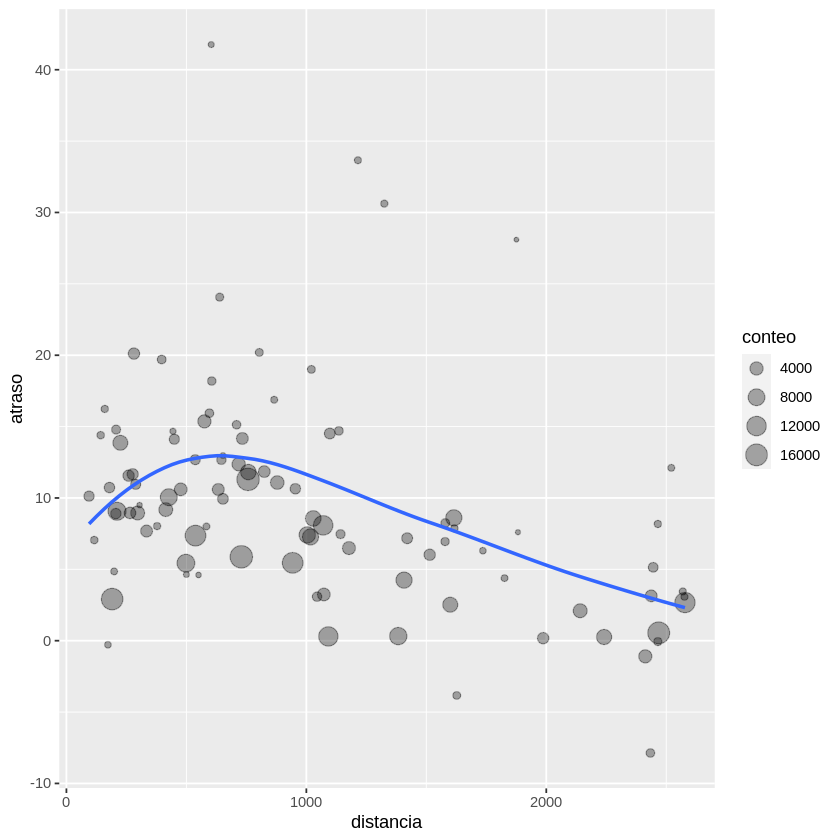

In [ ]:
por_destino <- group_by(flights, dest)
atraso <- summarise(por_destino,
conteo = n(),
distancia = mean(distance, na.rm = TRUE),
atraso = mean(arr_delay, na.rm = TRUE)
)

atraso <- filter(atraso, conteo > 20, dest != "HNL")
atraso
#Parece que las demoras aumentan con las distancias hasta ~ 750 millas 
#y luego disminuyen. ¿Tal vez a medida que los vuelos se hacen más
#largos, hay más habilidad para compensar las demoras en el aire?

ggplot(data = atraso, mapping = aes(x = distancia, y= atraso))+
geom_point(aes(size = conteo), alpha = 1/3)+
geom_smooth(se = FALSE)


Hay tres pasos para preparar esta información:

1. Agrupar los vuelos por destino.
2. Resumir para calcular la distancia, la demora promedio y el número de vuelos en cada grupo.
3. Filtrar para eliminar puntos ruidosos y el aeropuerto de Honolulu, que está casi dos veces más lejos que el próximo aeropuerto más cercano.

Es un poco frustrante escribir este código porque tenemos que dar un nombre a cada *data frame* intermedio, incluso si el *data frame* en sí mismo no nos importa. Nombrar cosas es dificíl y enlentece nuestro análisis.

Hay otra forma de abordar el mismo problema con el *pipe*, `%>%`:

In [ ]:
atrasos <- flights %>%
group_by(dest) %>%
summarise(
  conteo = n(),
  distancia = mean(distance, na.rm =TRUE),
  atraso = mean(arr_delay, na.rm = TRUE)
) %>%
filter(conteo < 20, dest != "HNL")
atrasos

dest,conteo,distancia,atraso
<chr>,<int>,<dbl>,<dbl>
ANC,8,3370.0,-2.500000
EYW,17,1207.0,6.352941
HDN,15,1728.0,2.142857
LEX,1,604.0,-22.000000
LGA,1,17.0,NaN
MTJ,15,1795.0,1.785714
PSP,19,2378.0,-12.722222
SBN,10,645.4,6.500000


Este código se enfoca en las transformaciones, no en lo que se está transformando, lo que hace que sea más fácil de leer. Puedes leerlo como una serie de declaraciones imperativas: agrupa, luego resume y luego filtra. Como sugiere esta lectura, una buena forma de pronunciar `%>%` cuando se lee el código es "luego".
Lo que ocurre detrás del código, es que `x %>% f(y)` se convierte en `f(x, y)` y `x %>% f(y) %>% g(z)`, se convierte en `g(f(x, y), z)` y así sucesivamente. Puedes usar el *pipe* para reescribir múltiples operaciones de forma que puedas leer de izquierda a derecha, de arriba hacia abajo. Usaremos *pipe* con frecuencia porque mejora considerablemente la legibilidad del código. 

### Valores faltantes

Es posible que te hayas preguntado sobre el argumento `na.rm` que utilizamos anteriormente. ¿Qué pasa si no lo configuramos?

In [ ]:
flights %>%
group_by(year, month, day) %>%
summarise(mean= mean(dep_delay))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,NA
2013,1,2,NA
2013,1,3,NA
2013,1,4,NA
2013,1,5,NA
2013,1,6,NA
2013,1,7,NA
2013,1,8,NA
2013,1,9,NA


¡Obtenemos muchos valores faltantes! Esto se debe a que las funciones de agregación obedecen la regla habitual de valores faltantes: si hay en el *input*, el *output* también será un valor faltante. Afortunadamente, todas las funciones de agregación tienen un argumento `na.rm` que elimina los valores faltantes antes del cálculo: 

In [ ]:
flights %>%
group_by(year, month, day) %>%
summarise(mean = mean(dep_delay, na.rm = TRUE))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477


En este caso, en el que los valores faltantes representan vuelos cancelados, también podríamos abordar el problema eliminando primero este tipo de vuelos. Guardaremos este conjunto de datos para poder reutilizarlo en los siguientes ejemplos.

In [ ]:
no_cancelados <- flights %>%
filter(!is.na(dep_delay), !is.na(arr_delay))

no_cancelados %>%
group_by(year, month, day) %>%
summarise(mean = mean(dep_delay))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,11.435620
2013,1,2,13.677802
2013,1,3,10.907778
2013,1,4,8.965859
2013,1,5,5.732218
2013,1,6,7.145959
2013,1,7,5.417204
2013,1,8,2.558296
2013,1,9,2.301232


### Conteos

Siempre que realices una agregación, es una buena idea incluir un conteo (`n()`) o un recuento de valores no faltantes (`sum(!is.na(x))`) . De esta forma, puedes verificar que no estás sacando conclusiones basadas en cantidades muy pequeñas de datos. Por ejemplo, veamos los aviones (identificados por su número de cola) que tienen demoras promedio altas: 

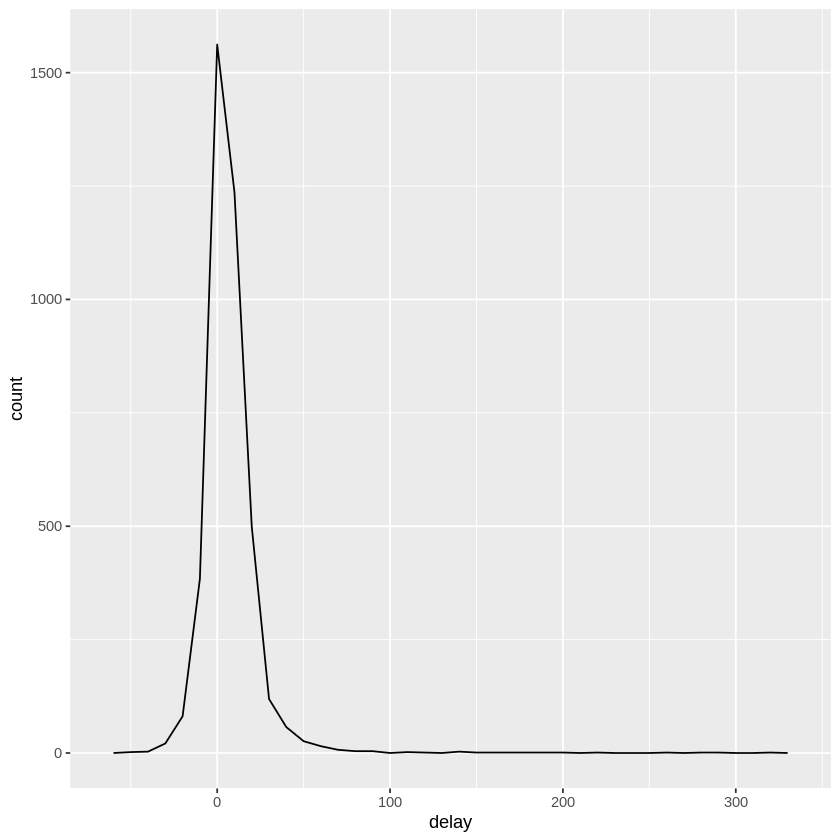

In [ ]:
atrasos <- no_cancelados %>%
group_by(tailnum) %>%
summarise(
  delay = mean(arr_delay)
)
ggplot(data = atrasos, mapping = aes(x = delay)) +
geom_freqpoly(binwidth = 10)

¡Hay algunos aviones que tienen una demora promedio de 5 horas (300 minutos)!

La historia es en realidad un poco más matizada. Podemos obtener más información si hacemos un diagrama de dispersión del número de vuelos contra la demora promedio: 

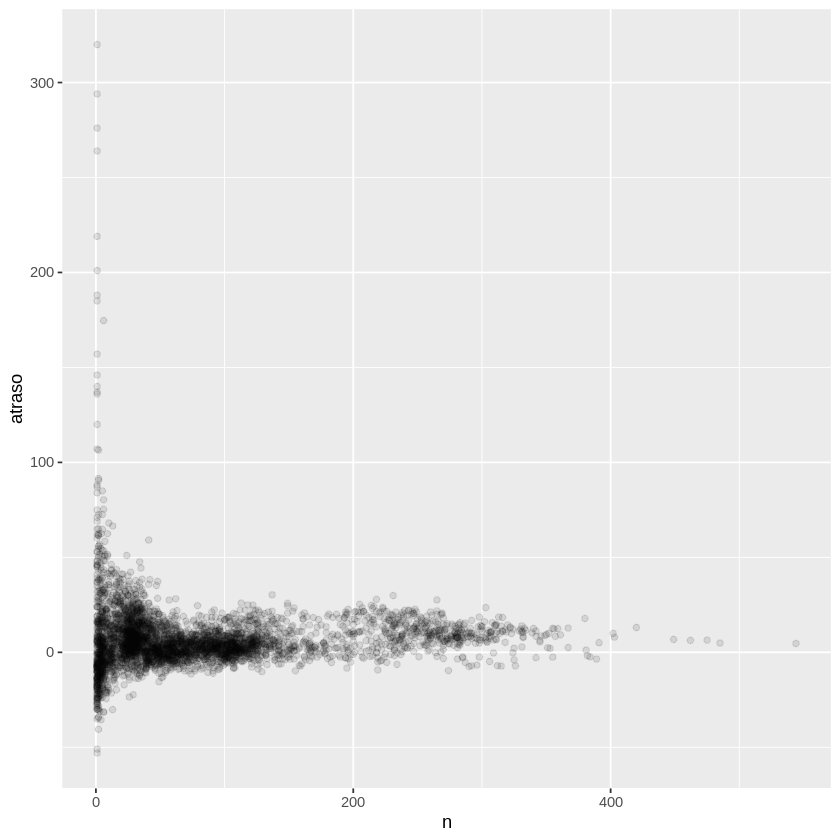

In [ ]:
atrasos <- no_cancelados %>%
group_by(tailnum) %>%
summarise(
  atraso = mean(arr_delay, na.rm = TRUE),
  n = n()
)

ggplot(data = atrasos, mapping = aes(x = n, y = atraso))+
geom_point(alpha = 1/10)

No es sorprendente que haya una mayor variación en el promedio de retraso cuando hay pocos vuelos. La forma de este gráfico es muy característica: cuando trazas un promedio (o cualquier otra medida de resumen) contra el tamaño del grupo, verás que la variación decrece a medida que el tamaño aumenta. 

Cuando se observa este tipo de gráficos, resulta útil eliminar los grupos con menor número de observaciones, ya que puedes ver más del patrón y menos de la variación extrema de los grupos pequeños. Esto es lo que hace el siguiente bloque de código. También te ofrece una manera muy útil para integrar ggplot2 en el flujo de trabajo de **dplyr**. Es un poco incómodo tener que cambiar de `%>%` a `+`, pero una vez que entiendas el código, verás que es bastante conveniente. 

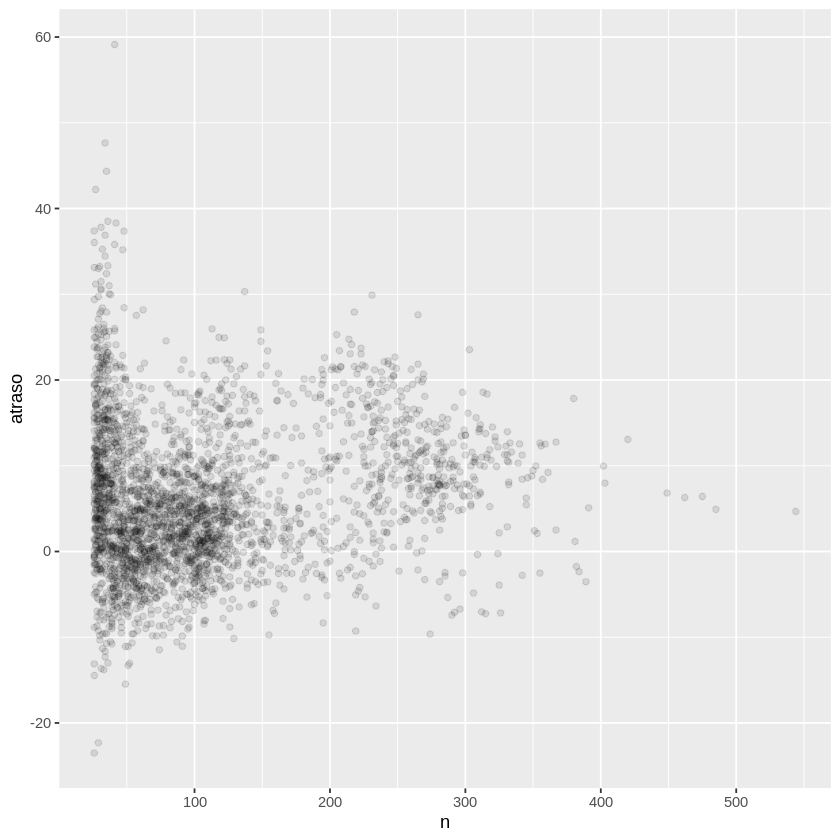

In [ ]:
atrasos %>%
filter (n > 25) %>%
ggplot(mapping = aes(x = n, y = atraso)) +
geom_point(alpha = 1/10)

Hay otra variación común de este tipo de patrón. Veamos cómo el rendimiento promedio de los bateadores en el béisbol está relacionado con el número de veces que les toca batear. Aquí utilizaremos el conjunto de datos `Lahman` para calcular el promedio de bateo (número de bateos / número de intentos) de cada jugador de béisbol de las Grandes Ligas. 

Cuando graficamos la habilidad del bateador (medido por el promedio de bateo `pb`) contra el número de oportunidades para golpear la pelota (medido por el tiempo al bate, `ab`), verás dos patrones: 

1. Como en el ejemplo anterior, la variación en nuestro estadístico de resumen disminuye a medida que obtenemos más observaciones.

2. Existe una correlación positiva entre la habilidad `pb`, y las oportunidades para golpear la pelota `ab`. Esto se debe a que los equipos controlan quién puede jugar y, obviamente, eligirán a sus mejores jugadores. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



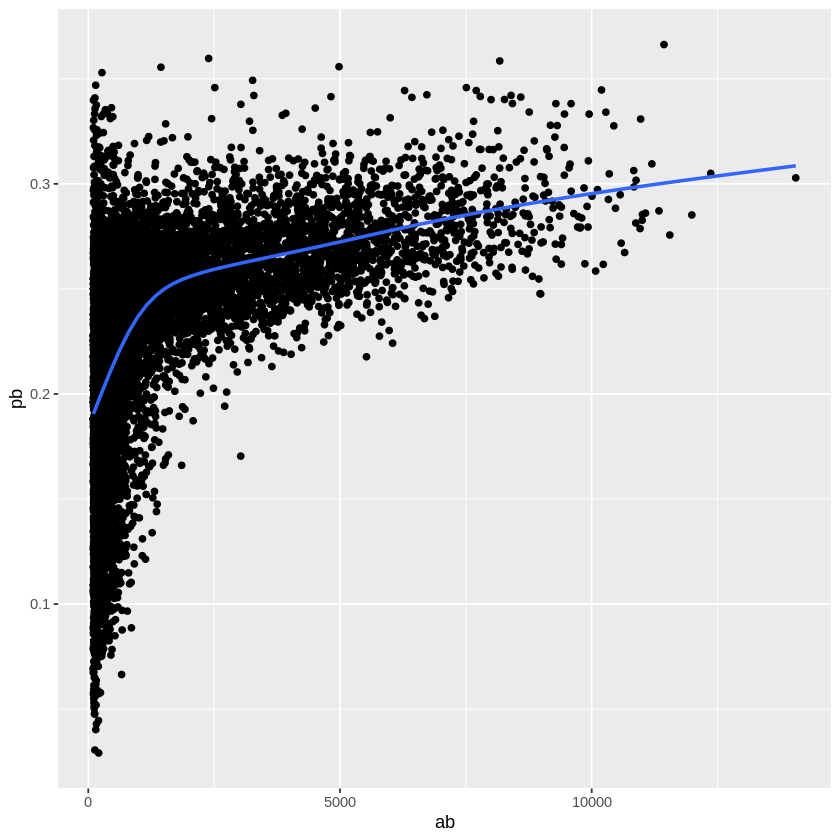

In [ ]:
# Convierte a tibble para que puedas imprimirlo de una manera ligible
bateo <- as_tibble(Lahman::Batting)

rendimiento_bateadores <- bateo %>%
group_by(playerID) %>%
summarise(
  pb = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
  ab = sum(AB, na.rm = TRUE)
)

rendimiento_bateadores %>%
filter(ab > 100) %>%
ggplot(mapping = aes(x = ab, y = pb))+
geom_point()+
geom_smooth(se = FALSE)

Esto también tiene implicaciones importantes para la clasificación. Si ingenuamente ordenas `desc(pb)`, verás que las personas con los mejores promedios de bateo tienen claramente mucha suerte, pero no son necesariamente hábiles.

In [ ]:
rendimiento_bateadores %>%
arrange(desc(pb))

playerID,pb,ab
<chr>,<dbl>,<int>
abramge01,1,1
alanirj01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1


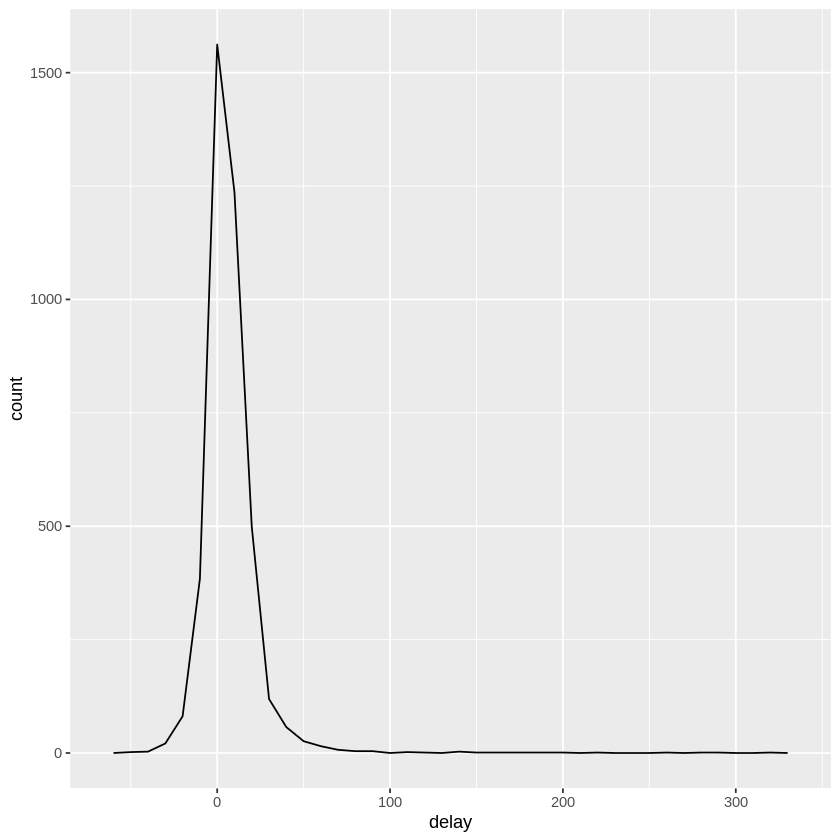

In [ ]:
atrasos <- no_cancelados %>%
group_by(tailnum) %>%
summarise(
  delay = mean(arr_delay)
)
ggplot(data = atrasos, mapping = aes(x = delay)) +
geom_freqpoly(binwidth = 10)

¡Hay algunos aviones que tienen una demora promedio de 5 horas (300 minutos)!

La historia es en realidad un poco más matizada. Podemos obtener más información si hacemos un diagrama de dispersión del número de vuelos contra la demora promedio: 

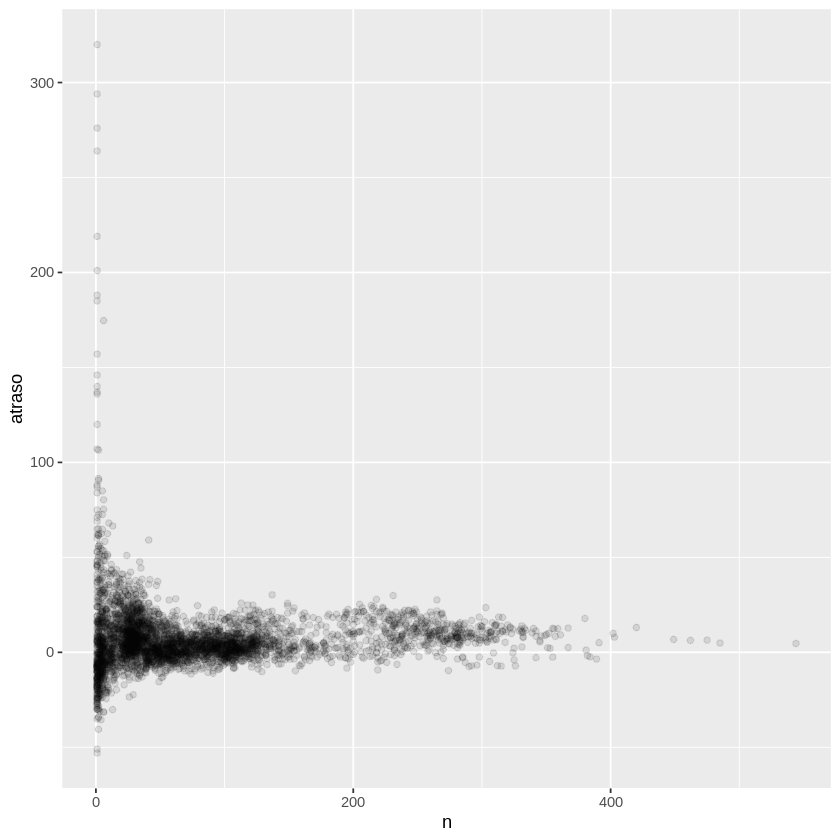

In [ ]:
atrasos <- no_cancelados %>%
group_by(tailnum) %>%
summarise(
  atraso = mean(arr_delay, na.rm = TRUE),
  n = n()
)

ggplot(data = atrasos, mapping = aes(x = n, y = atraso))+
geom_point(alpha = 1/10)

No es sorprendente que haya una mayor variación en el promedio de retraso cuando hay pocos vuelos. La forma de este gráfico es muy característica: cuando trazas un promedio (o cualquier otra medida de resumen) contra el tamaño del grupo, verás que la variación decrece a medida que el tamaño aumenta. 

Cuando se observa este tipo de gráficos, resulta útil eliminar los grupos con menor número de observaciones, ya que puedes ver más del patrón y menos de la variación extrema de los grupos pequeños. Esto es lo que hace el siguiente bloque de código. También te ofrece una manera muy útil para integrar ggplot2 en el flujo de trabajo de **dplyr**. Es un poco incómodo tener que cambiar de `%>%` a `+`, pero una vez que entiendas el código, verás que es bastante conveniente. 

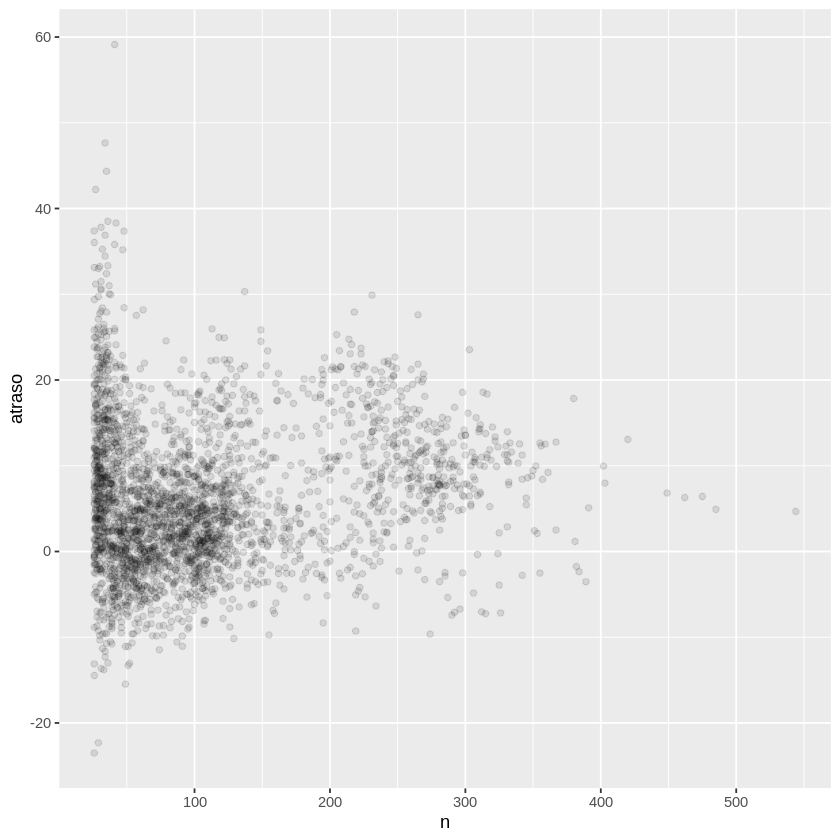

In [ ]:
atrasos %>%
filter (n > 25) %>%
ggplot(mapping = aes(x = n, y = atraso)) +
geom_point(alpha = 1/10)

Hay otra variación común de este tipo de patrón. Veamos cómo el rendimiento promedio de los bateadores en el béisbol está relacionado con el número de veces que les toca batear. Aquí utilizaremos el conjunto de datos `Lahman` para calcular el promedio de bateo (número de bateos / número de intentos) de cada jugador de bésibol de las Grandes Ligas. 

Cuando graficamos la habilidad del bateador (medido por el promedio de bateo `pb`) contra el número de oportunidades para golpear la pelota (medido por el tiempo al bate, `ab`), verás dos patrones: 

1. Como en el ejemplo anterior, la variación en nuestro estadístico de resumen disminuye a medida que obtenemos más observaciones.

2. Existe una correlación positiva entre la habilidad `pb`, y las oportunidades para golpear la pelota `ab`. Esto se debe a que los equipos controlan quién puede jugar y, obviamente, elegirán a sus mejores jugadores. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



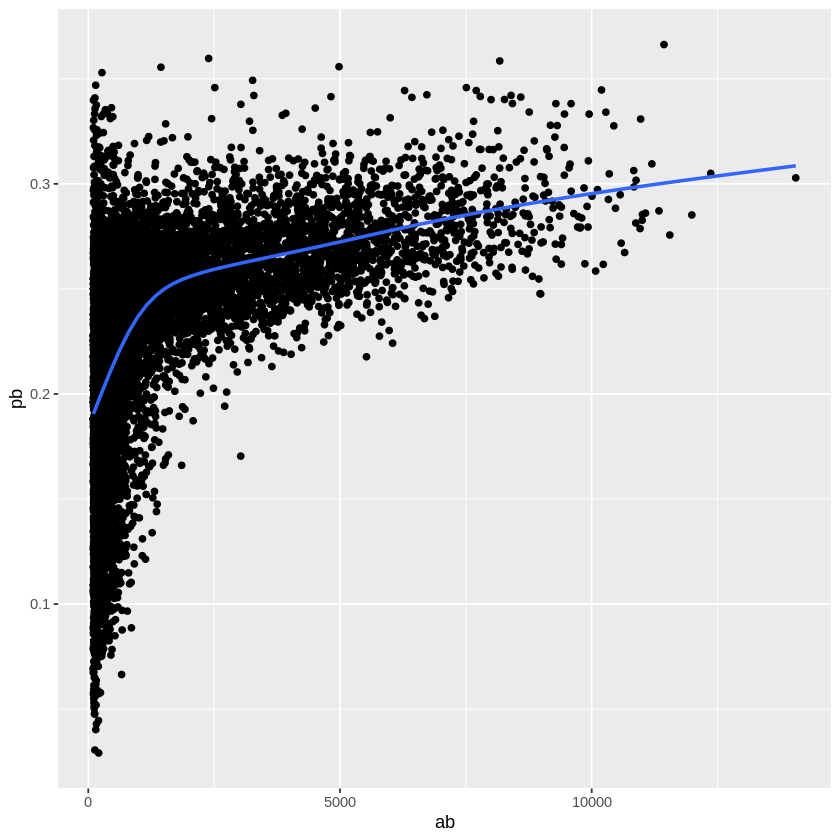

In [ ]:
# Convierte a tibble para que puedas imprimirlo de una manera ligible
bateo <- as_tibble(Lahman::Batting)

rendimiento_bateadores <- bateo %>%
group_by(playerID) %>%
summarise(
  pb = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
  ab = sum(AB, na.rm = TRUE)
)

rendimiento_bateadores %>%
filter(ab > 100) %>%
ggplot(mapping = aes(x = ab, y = pb))+
geom_point()+
geom_smooth(se = FALSE)

Esto también tiene implicaciones importantes para la clasificación. Si ingenuamente ordenas `desc(pb)`, verás que las personas con los mejores promedios de bateo tienen claramente mucha suerte, pero no son necesariamente hábiles.

In [ ]:
rendimiento_bateadores %>%
arrange(desc(pb))

playerID,pb,ab
<chr>,<dbl>,<int>
abramge01,1,1
alanirj01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1


### Funciones de resumen útiles

Solo el uso de medias, conteos y sumas puede llevarte muy lejos, pero R proporciona muchas otras funciones de resumen útiles: 

* Medidas de centralidad: hemos usado `mean()`, pero `median(x)` también resulta muy útil. La media es la suma dividida por el número de observaciones; la mediana es un valor donde el 50% de `x` está por encima de él y el 50% está por debajo. A veces es útil combinar agregación con un subconjunto lógico.

In [ ]:
diario <- group_by(flights, year, month, day)
(por_dia <- summarise(diario, flights = n()))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


In [ ]:
(por_mes <- summarise(por_dia, flights = sum(flights)))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,flights
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574


In [ ]:
(por_año <- summarise(por_mes, flights = sum(flights)))

year,flights
<int>,<int>
2013,336776


Ten cuidado al acumular resúmenes progresivamente: está bien para las sumas y los recuentos, pero debes pensar en la ponderación de las medias y las varianzas, además de que no es posible hacerlo exactamente para estadísticas basadas en rangos como la mediana. En otras palabras, la suma de las sumas agrupadas es la suma total, pero la mediana de las medianas agrupadas no es la mediana general. 

In [ ]:
no_cancelados %>%
group_by(year, month, day) %>%
summarise(
  prom_atraso1 = mean (arr_delay),
  prom_atraso2 = mean(arr_delay[arr_delay >0]) # El promedio de atrasos positivo
)

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,prom_atraso1,prom_atraso2
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,12.6510229,32.48156
2013,1,2,12.6928879,32.02991
2013,1,3,5.7333333,27.66087
2013,1,4,-1.9328194,28.30976
2013,1,5,-1.5258020,22.55882
2013,1,6,4.2364294,24.37270
2013,1,7,-4.9473118,27.76132
2013,1,8,-3.2275785,20.78909
2013,1,9,-0.2642777,25.63415


Conteos y proporciones de valores lógicos: `sum(x > 10)`, `mean(y == 0)`. Cuando se usan con funciones numéricas, `TRUE` se convierte en 1 y `FALSE` en 0. Esto hace que `sum()` y `mean()` sean útiles: `sum(x)` te da la cantidad de `TRUE` en `x`, y `mean(x)` te da la proporción. 

In [ ]:
# ¿Cuántos vuelos salieron antes de las 5am?
# (estos generalmente son vuelos demorados del día anterior)

no_cancelados %>%
group_by(year, month, day) %>%
summarise(n_early = sum(dep_time < 500))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,n_early
<int>,<int>,<int>,<int>
2013,1,1,0
2013,1,2,3
2013,1,3,4
2013,1,4,3
2013,1,5,3
2013,1,6,2
2013,1,7,2
2013,1,8,1
2013,1,9,3


In [ ]:
# ¿Qué proporción de vuelos se retrasan más de una hora?

no_cancelados %>%
group_by(year, month, day) %>%
summarise(hour_prop = mean(arr_delay > 60))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,hour_prop
<int>,<int>,<int>,<dbl>
2013,1,1,0.07220217
2013,1,2,0.08512931
2013,1,3,0.05666667
2013,1,4,0.03964758
2013,1,5,0.03486750
2013,1,6,0.04704463
2013,1,7,0.03333333
2013,1,8,0.02130045
2013,1,9,0.02015677


### Agrupación por múltiples variables

Cuando agrupas múltiples variables, cada resumen se desprende de un nivel de la agrupación. Eso hace que sea más fácil acumular progresivamente en un conjunto de datos: 

In [ ]:
diario <- group_by(flights, year, month, day)
(por_dia <- summarise(diario, flights = n()))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


In [ ]:
(por_mes <- summarise(por_dia, flights = sum(flights)))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,flights
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574


In [ ]:
(por_año <- summarise(por_mes, flights = sum(flights)))

year,flights
<int>,<int>
2013,336776


Ten cuidado al acumular resúmenes progresivamente: está bien para las sumas y los recuentos, per debes pensar en la ponderación de las medias y las varianzas, además de que no es posible hacerlo exactamente para estadísticas basadas en rangos como la mediana. En otras palabras, la suma de las sumas agrupadas es la suma total, pero la mediana de las medianas agrupadas no es la mediana general. 

### Desagrupar

Si necesitas eliminar la agrupación y regresar a las operaciones en datos desagrupados, usa `ungroup()`.

In [ ]:
diario %>%
ungroup() %>% #Ya no está agrupado por fecha
summarise(flights = n()) # Todos los vuelos

flights
<int>
336776


### Ejercicios



1. Haz una lluvia de ideas de al menos 5 formas diferentes de evaluar las características de un retraso típico de un grupo de vuelos. Considera los siguientes escenarios: 

* Un vuelo llega 15 minutos antes 50% del tiempo, y 15 minutos tarde 50% del tiempo.
* un vuelo llega siempre 10 minutos tarde.
* un vuelo llega 30 minutos antes 50% del tiempo, y 30 minutos tarde 50% del tiempo.
* un vuelo llega a tiempo en el 99% de los casos. 1% de las veces llega 2 horas tarde.

¿Qué es más importante: retraso de la llegada o demora de la salida?

---

2. Sugiere un nuevo enfoque que te dé el mismo output que `no_cancelados %>% count(dest)` y `no_cancelados %>% count(tainum, wt=distance)` (sin usar `count()`).

---

3. Nuestra definición de vuelos cancelados (`is.na(dep_delay) | is.na(arr_delay)`) es un poco subóptima. ¿Por qué? ¿Cuál es la columna más importante?

---

4. Mira la cantidad de vuelos cancelados por día ¿Hay un patrón? ¿La proporción de vuelos cancelados está relacionada con el retraso promedio?

---

5. ¿Qué compañía tiene los peores retrasos? Desafío: ¿puedes desenredar el efecto de malos aeropuertos vs el efecto de malas aerolíneas? ¿Por qué o por qué no? (Sugerencia: piensa en `flights %>% group_by(carrier, dest) %>% summarise (n())`)

---

6. ¿Qué hace el argumento `sort`a `count()`. ¿Cuándo podrías usarlo?

---

## Transformaciones agrupadas (y filtros)

La agrupación es más útil si se utiliza junto con `summarise()`, pero también puedes hacer operaciones convenientes con `mutate()` y `filter()`:

* Encuentra los peores miembros de cada grupo: 

In [ ]:
flights_sml %>%
group_by(year, month, day) %>%
filter(rank(desc(arr_delay)) < 10)

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,853,851,184,41
2013,1,1,290,338,1134,213
2013,1,1,260,263,266,46
2013,1,1,157,174,213,60
2013,1,1,216,222,708,121
2013,1,1,255,250,589,115
2013,1,1,285,246,1085,146
2013,1,1,192,191,199,44
2013,1,1,379,456,1092,222


* Encuentra todos los grupos más grandes que un determinado umbral: 

In [ ]:
destinos_populares <- flights %>%
group_by(dest) %>%
filter(n() > 365)
destinos_populares

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


* Estandariza para calcular las métricas por grupo: 

In [ ]:
destinos_populares %>%
filter(arr_delay > 0) %>%
mutate(prop_delay = arr_delay / sum(arr_delay)) %>%
select(year:day, dest, arr_delay, prop_delay)

year,month,day,dest,arr_delay,prop_delay
<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2013,1,1,IAH,11,1.106740e-04
2013,1,1,IAH,20,2.012255e-04
2013,1,1,MIA,33,2.350026e-04
2013,1,1,ORD,12,4.239594e-05
2013,1,1,FLL,19,9.377853e-05
2013,1,1,ORD,8,2.826396e-05
2013,1,1,LAX,7,3.444441e-05
2013,1,1,DFW,31,2.817951e-04
2013,1,1,ATL,12,3.996017e-05


Un filtro agrupado es una transformación agrupada seguida de un filtro desagrupado. En general, preferimos evitarlos, excepto para las manipulaciones rápidas y sucias: de lo contrario, es difícil comprobar que has hecho la manipulación correctamente. 

Las funciones que trabajan de forma más natural en transformaciones agrupadas y filtros se conocen como funciones de ventana o *window functions* (frente a las funciones de resumen utilizadas para los resúmenes). Puede obtener más infromación sobre las funciones de ventana útiles en la viñeta correspondiente `vignette("window-functions")`.

### Ejercicios


1. Remítete a las listas de funciones útiles de mutación y filtrado. Describe cómo cambia cada operación cuando las combinas con la agrupación. 

---

2. ¿Qué avión (`tailnum`) tiene el peor registro de tiempo?

---

3. ¿A qué hora del día deberías volar si quieres evitar lo más posible retrasos?

---

4. Para cada destino, calcula los minutos totales de demora. Para cada vuelo, calcula la proporción de la demora total para su destino.

---

5. Los retrasos suelen estar temporalmente correlacionados: incluso una vez que el problema que causó el retraso inicial se ha resuelto, los vuelos posteriores se retrasan para permitir que salgan los vuelos anteriores. Usando `lag()`, explora cómo el retraso de un vuelo está relacionado con el retraso del vuelo inmediatamente anterior. 

---

6. Mira cada destino ¿Puedes encontrar vuelos sospechosamente rápidos? (es decir, vuelos que representan un posible error de entrada de datos). Calcula el tiempo en el aire de un vuelo relativo al vuelo más corto a ese destino ¿Cuáles vuelos se retrasaron más en el aire?

----

7. Encuentra todos los destinos que son volados por al menos dos operadores. Usa esta información para clasificar a las aerolíneas.

---

8. Para cada avión, cuenta el número de vuelos antes del primer retraso de más de 1 hora.

---